# Rede SOM 

Treinamento de uma Rede SOM realizado para o agrupamento de clientes. O dataset utilizado foi o "Credit Card Dataset for Clustering" disponível no Kaggle. O dataset consta com o seguites atributos:

*  **CUSTID:** Identificação do cliente
*  **BALANCE:** Saldo restante na conta para fazer compras
*  **BALANCEFREQUENCY:** Frequência que o saldo é atualizado, pontuação entre 0 e 1
*  **PURCHASES:** Valor das compras realizadas a partir da conta PURCHASES.
*  **ONEOFFPURCHASES:** Valor máximo da compra realizada de uma só vez.
*  **INSTALLMENTSPURCHASES:** Valor da compra parcelada.
*  **CASHADVANCE:** Antecipado dado pelo usuário.
*  **PURCHASESFREQUENCY:** Frequência com que as compras estão sendo feitas, pontuação entre 0 e 1.
*  **ONEOFFPURCHASESFREQUENCY:** Com que frequência as compras acontecem de uma vez. 
*  **PURCHASESINSTALLMENTSFREQUENCY:** Frequência com que as compras a prazo estão sendo feitas 
*  **CASHADVANCEFREQUENCY:** Frequência com que o dinheiro antecipado está sendo pago.
*  **CASHADVANCETRX:** Número de transações feitas com "Dinheiro adiantado". 
*  **PURCHASESTRX:** Número de transações de compra feito.
*  **CREDITLIMIT:** Limite do cartão de crédito para PAGAMENTOS do usuário.
*  **PAYMENTS:** Valor do pagamento feito pelo usuário.
*  **MINIMUM_PAYMENTS:** Valor mínimo dos pagamentos feitos pelo usuário.
*  **PRCFULLPAYMENT:** Porcentagem do pagamento total pago pelo usuário.
*  **TENURE:** Posse do serviço de cartão de crédito para o usuário.

# Importação e Análise Incial dos Dados

In [112]:
import pandas as pd
dataset = pd.read_csv("CC GENERAL.csv")
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [113]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Ajustes no Dataset

In [114]:
dataset.dropna(inplace=True)
dataset.drop(['CUST_ID', 'PRC_FULL_PAYMENT', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'TENURE', 'MINIMUM_PAYMENTS', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'],axis=1, inplace=True)
dataset.head()

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
0,40.900749,95.40,0.000000,0.166667,0.000000,0.083333,2,1000.0,201.802084
1,3202.467416,0.00,6442.945483,0.000000,0.000000,0.000000,0,7000.0,4103.032597
2,2495.148862,773.17,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742
4,817.714335,16.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763
5,1809.828751,1333.28,0.000000,0.666667,0.000000,0.583333,8,1800.0,1400.057770


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(dataset)

In [116]:
[row, col] = X_train.shape
print(row, " ", col)
print(X_train[1,:])

8636   9
[ 0.76415211 -0.47320819  2.56855647 -1.2361389  -0.68627958 -0.92652157
 -0.59705416  0.67720406  0.79685226]


# Treinamento

In [117]:
!pip install minisom

In [122]:
x_size_network = 8
y_size_network = 8

number_of_features = col
from minisom import MiniSom
som = MiniSom(x = x_size_network, y = y_size_network, input_len = number_of_features, sigma = 1.0, learning_rate = 0.4)
som.pca_weights_init(X_train)

In [124]:
som.train_random(data = X_train, num_iteration = 800000)

# Validação do Treinamento

In [125]:
import matplotlib.pyplot as plt
import numpy as np
pesos = som.get_weights()

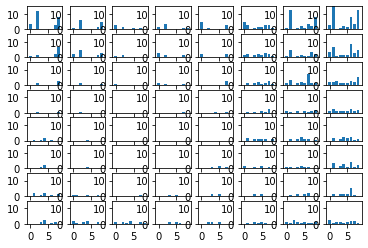

In [126]:
# Mostra todos os pesos 
cont = 1;
x = np.arange(number_of_features)
for row in pesos:
  for elem in row:
    plt.subplot(x_size_network,y_size_network, cont)
    cont=cont+1
    plt.axis([-1, 9, 0, 15])
    plt.bar(x, elem)
plt.show()
#plt.savefig("test_som.jpg", dpi=150)

In [127]:
def mostraNeuronio(linha, coluna):
  x = ['BAL', 'PUR', 'CASH', 'PURF', 'ONEOFF',  'PURI', 'PURT', 'CREDL', 'PAY']
  plt.axis([-1, 9, 0, 15])
  plt.bar(x, pesos[linha,coluna,:])
  plt.show()

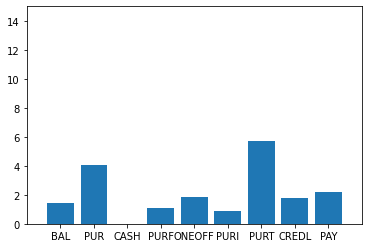

In [109]:
mostraNeuronio(0,0)

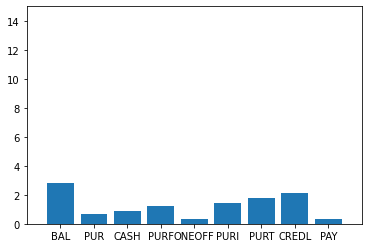

In [128]:
mostraNeuronio(7,7)